## Sentiment Analysis using Kaggle

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1622038456213045249  1622038456213045249  2023-02-05 01:04:38 UTC   
1  1622038455965327360  1621920466276319234  2023-02-05 01:04:38 UTC   
2  1622038455520792579  1618722690273247233  2023-02-05 01:04:38 UTC   
3  1622038448608608256  1621966194906636288  2023-02-05 01:04:36 UTC   
4  1622038435442688001  1622038435442688001  2023-02-05 01:04:33 UTC   

         date      time  timezone              user_id        username  \
0  2023-02-05  01:04:38         0  1332191177190252544      beeken_fin   
1  2023-02-05  01:04:38         0  1613800461991034881   michaeiarroyo   
2  2023-02-05  01:04:38         0  1513765750426808320     rbaker92345   
3  2023-02-05  01:04:36         0              9285512  whatsinitforme   
4  2023-02-05  01:04:33         0             39483032       lixandrao   

                                       name place  ... geo source user_rt_id  \
0                          Beeken Financia

In [2]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [3]:
data = data[["username", "tweet", "language"]]

In [4]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [5]:
data["language"].value_counts()

en     8884
pt      380
it      237
qme      94
in       63
und      59
es       57
ja       39
ca       25
de       24
th       21
fr       15
ru       15
fi       13
nl       10
tr        9
ro        9
pl        9
ar        7
qht       7
tl        5
ht        5
zh        3
qam       3
et        2
cs        1
uk        1
iw        1
sv        1
da        1
el        1
hi        1
no        1
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /Users/sriki/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


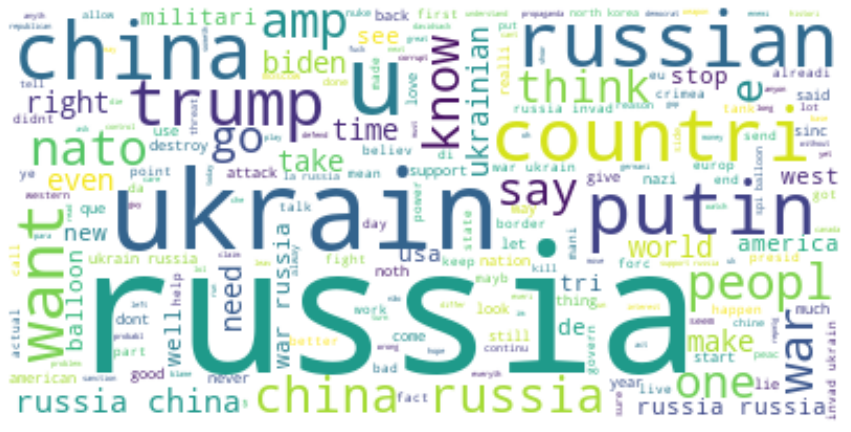

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Add Positive, Negative and Neutral columns for Sentiment Analysis

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sriki/nltk_data...


                                               tweet  Positive  Negative  \
0  sbrci  russia sberbank plan launch defi platfo...       0.0     0.000   
1     wanderinglord kuchitetrapod    jackwhoels t...       0.0     0.144   
2  elonmusk evafoxu lukewearechang probabl contin...       0.0     0.189   
3   davidsack richardgrenel won't russia chose invad       0.0     0.000   
4  começou desarmamento😃🤣  não vejo hora de encon...       0.0     0.000   

   Neutral  
0    1.000  
1    0.856  
2    0.811  
3    1.000  
4    1.000  


## Positive Sentiments

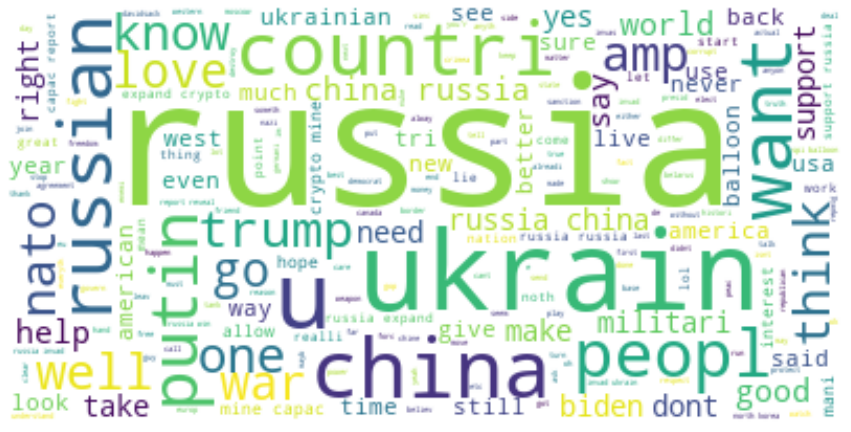

In [9]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negative Sentiments

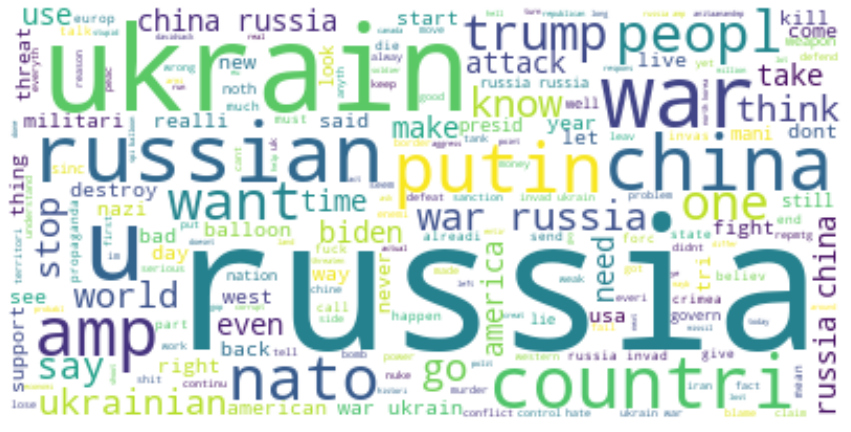

In [10]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()